In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean
import gsw

import scipy.stats as ss

In [119]:
infile = "../Calculations/SPIROPA_compileddata.csv"
df = pd.read_csv(infile)
df.columns

Index(['month', 'day', 'cast', 'lat', 'lon', 'truedepth_m', 'nfr', 'nfr_sd',
       'nfr_lod', 'fc', 'fc_sd', 'fc_lod', 'pc_uM', 'pc_sd', 'pn_uM', 'pn_sd',
       'press_db', 'sigmat', 'do_umolkg', 'sal', 'temp_c', 'pottemp', 'par',
       'spar', 'no3', 'nh4', 'po4', 'sio4'],
      dtype='object')

In [86]:
infile = "../Data/SPIROPA_stalocations.csv"
stdf = pd.read_csv(infile)
stdf.columns

Index(['Station', 'WaterZ_m', 'Lat', 'Lon'], dtype='object')

In [98]:
# group by cruise
rb = df[df.month == 5]
tn = df[df.month == 7]

# main line
rb_ml = df[(df.month == 5) & (df.lon<70.85) & (df.lon>70.8)]
tn_ml = df[(df.month == 7) & (df.lon<70.85) & (df.lon>70.8)]

tn_nostream = df[(df.month == 7) & (df.day > 8)]
tn_nostream_ml = df[(df.month == 7) & (df.day > 8)&(df.lon<70.85)&(df.lon>70.8)]

# distinguish sfc rates
rb_sfc = rb[rb.truedepth_m<10]
tn_sfc = tn[(tn.truedepth_m<10)&(df.month == 7) & (df.day > 8)]

# distinguish streamer
stream = tn[tn.day < 9]

C:\Users\corda\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [88]:
max(tn_nostream.lat)

40.464833

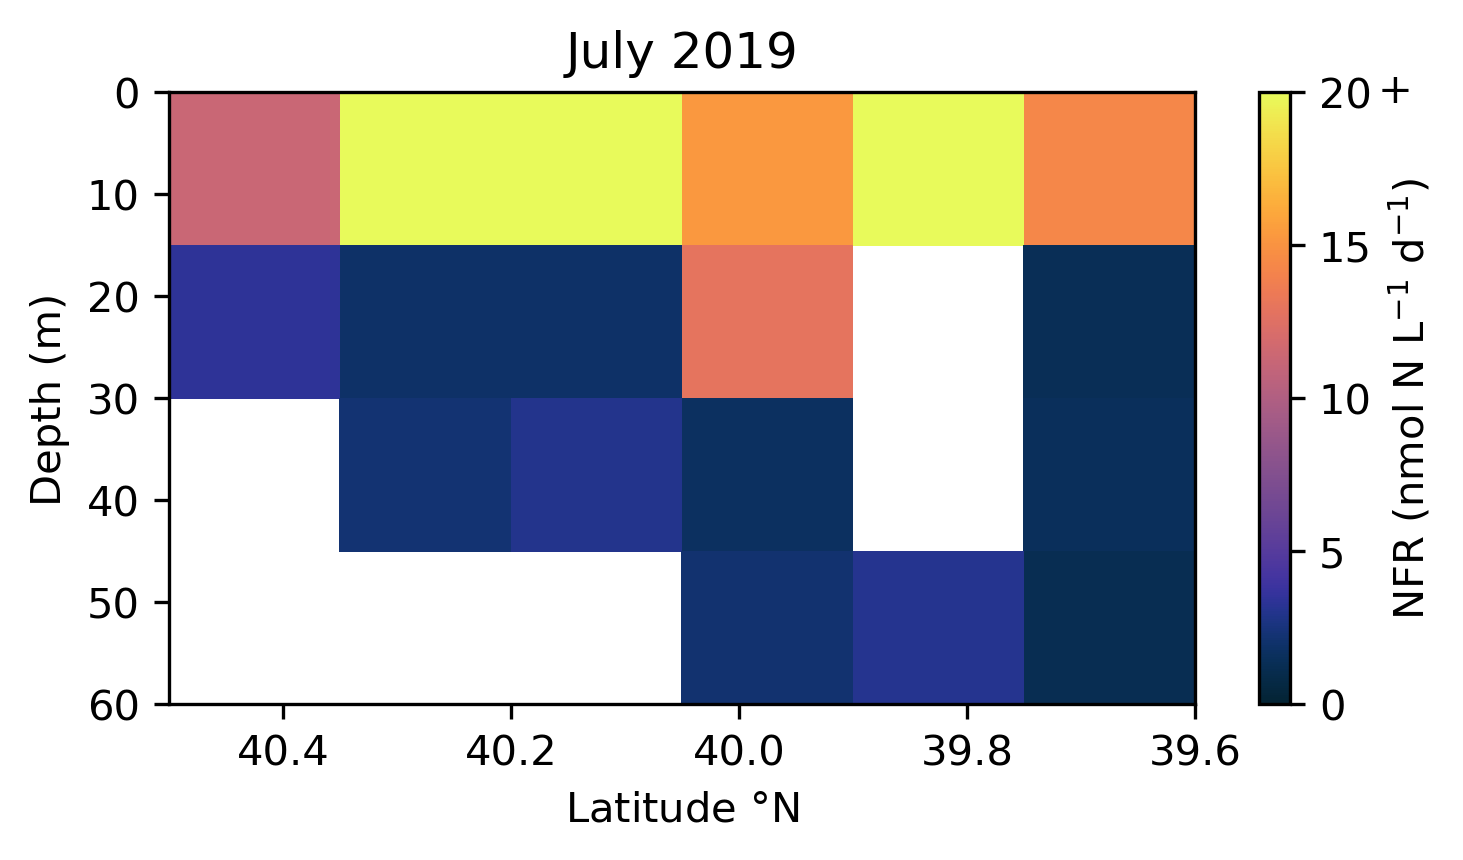

In [168]:
# need to bin the data into a grid to contour it

# make a grid
y = np.arange(0, 65, 15)
x = np.arange(39.6, 40.6, 0.15)

xx, yy = np.meshgrid(x, y)

# h = plt.plot(xx, yy, 'o')
# plt.show()

a = tn_nostream_ml.lat # x variable
b = tn_nostream_ml.truedepth_m # y variable
c = tn_nostream_ml.nfr # z variable
binned = ss.binned_statistic_2d(a, b, c, statistic='mean', bins=[x, y])

# plot the binned data

XX, YY = np.meshgrid(binned.x_edge, binned.y_edge)

palette = 'cmo.thermal'

fig, (ax) =  plt.subplots(1, 1, figsize = (5, 3), dpi = 300)
plt.pcolormesh(XX, YY, binned.statistic.T, vmin = 0, vmax = 20, cmap = palette)
cb = plt.colorbar()
cb.set_label('NFR (nmol N L$^{-1}$ d$^{-1}$)')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('July 2019')
ax.set_xlabel('Latitude $\degree$N')
ax.set_ylabel('Depth (m)')

cb.set_ticks(np.arange(0,21,5))
plt.text(39.44,1,'+')

plt.subplots_adjust(bottom=0.2, right = 0.98)

plt.savefig('../Figures/tn_nfr_section.png')

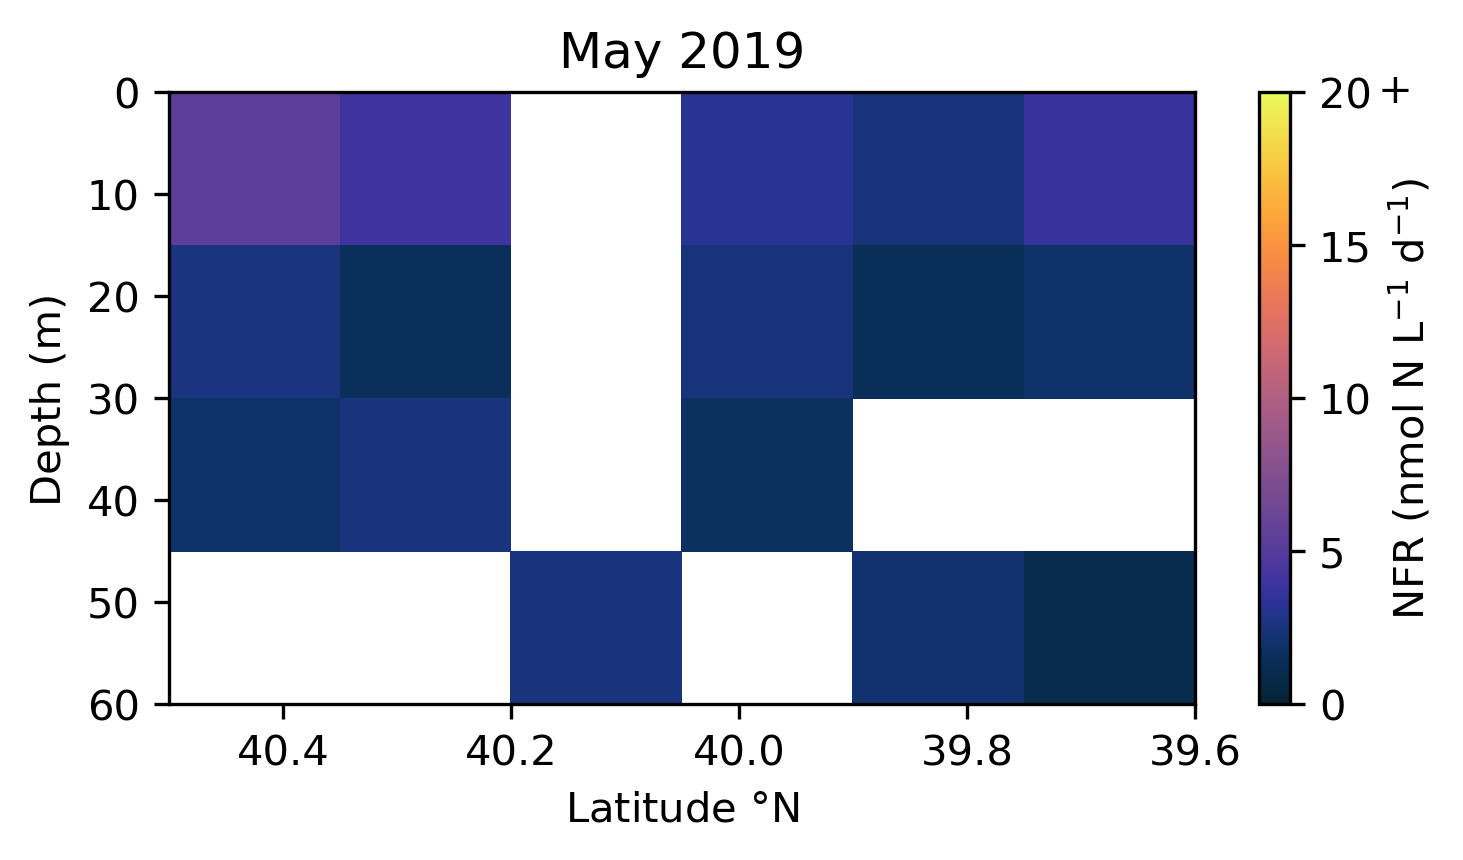

In [171]:
# need to bin the data into a grid to contour it

# make a grid
y = np.arange(0, 65, 15)
x = np.arange(39.6, 40.6, 0.15)

xx, yy = np.meshgrid(x, y)

# h = plt.plot(xx, yy, 'o')
# plt.show()

a = rb_ml.lat # x variable
b = rb_ml.truedepth_m # y variable
c = rb_ml.nfr # z variable
binned = ss.binned_statistic_2d(a, b, c, statistic='mean', bins=[x, y])

# plot the binned data

XX, YY = np.meshgrid(binned.x_edge, binned.y_edge)

palette = 'cmo.thermal'

fig, (ax) =  plt.subplots(1, 1, figsize = (5, 3), dpi = 300)
plt.pcolormesh(XX, YY, binned.statistic.T, vmin = 0, vmax = 20, cmap = palette)
cb = plt.colorbar()
cb.set_label('NFR (nmol N L$^{-1}$ d$^{-1}$)')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('May 2019')
ax.set_xlabel('Latitude $\degree$N')
ax.set_ylabel('Depth (m)')

cb.set_ticks(np.arange(0,21,5))
plt.text(39.44,1,'+')
plt.subplots_adjust(bottom=0.2, right = 0.98)

plt.savefig('../Figures/rb_nfr_section.png')

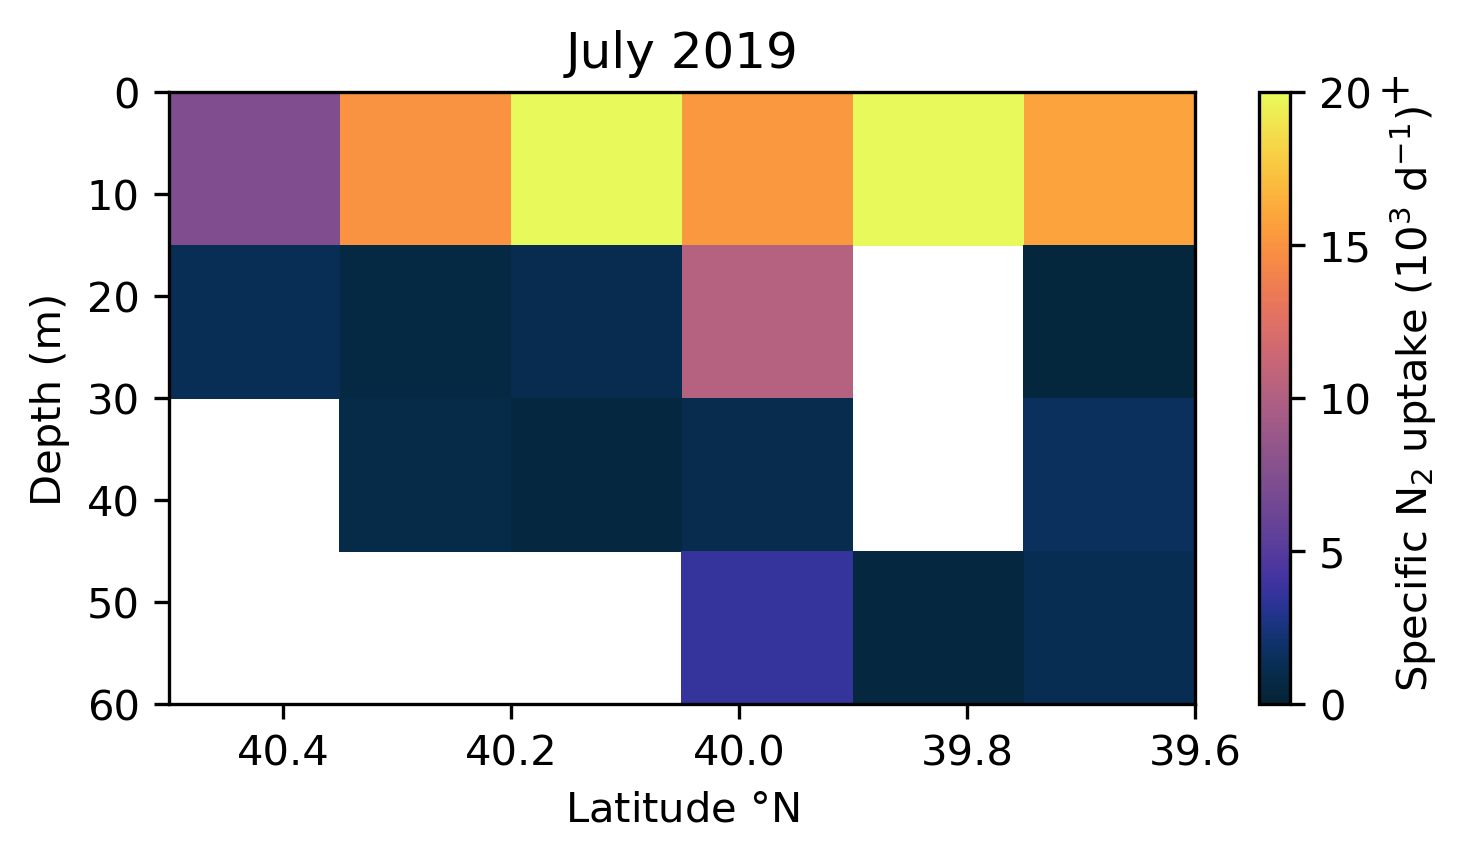

In [176]:
# need to bin the data into a grid to contour it

# make a grid
y = np.arange(0, 65, 15)
x = np.arange(39.6, 40.6, 0.15)

xx, yy = np.meshgrid(x, y)

# h = plt.plot(xx, yy, 'o')
# plt.show()

a = tn_nostream_ml.lat # x variable
b = tn_nostream_ml.truedepth_m # y variable
c = 1000*tn_nostream_ml.fc # z variable
binned = ss.binned_statistic_2d(a, b, c, statistic='mean', bins=[x, y])

# plot the binned data

XX, YY = np.meshgrid(binned.x_edge, binned.y_edge)

palette = 'cmo.thermal'

fig, (ax) =  plt.subplots(1, 1, figsize = (5, 3), dpi = 300)
plt.pcolormesh(XX, YY, binned.statistic.T, vmin = 0, vmax = 20, cmap = palette)
cb = plt.colorbar()
cb.set_label('Specific N$_{2}$ uptake (10$^{3}$ d$^{-1}$)')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('July 2019')
ax.set_xlabel('Latitude $\degree$N')
ax.set_ylabel('Depth (m)')

cb.set_ticks(np.arange(0,21,5))
plt.text(39.44,1,'+')

plt.subplots_adjust(bottom=0.2, right = 0.98)

plt.savefig('../Figures/tn_fc_section.png')

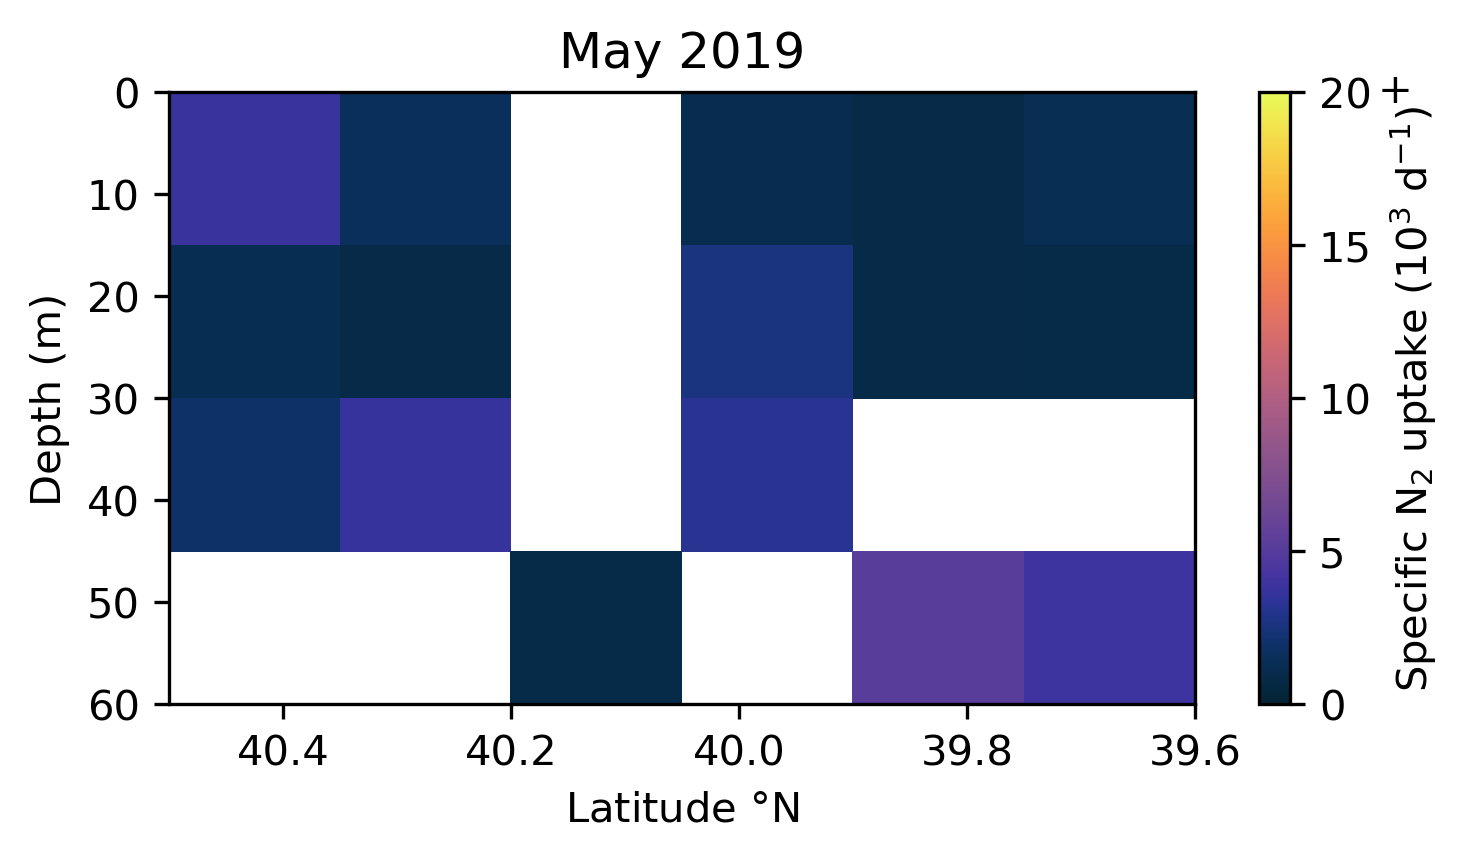

In [175]:
# need to bin the data into a grid to contour it

# make a grid
y = np.arange(0, 65, 15)
x = np.arange(39.6, 40.6, 0.15)

xx, yy = np.meshgrid(x, y)

# h = plt.plot(xx, yy, 'o')
# plt.show()

a = rb_ml.lat # x variable
b = rb_ml.truedepth_m # y variable
c = 1000*rb_ml.fc # z variable
binned = ss.binned_statistic_2d(a, b, c, statistic='mean', bins=[x, y])

# plot the binned data

XX, YY = np.meshgrid(binned.x_edge, binned.y_edge)

palette = 'cmo.thermal'

fig, (ax) =  plt.subplots(1, 1, figsize = (5, 3), dpi = 300)
plt.pcolormesh(XX, YY, binned.statistic.T, vmin = 0, vmax = 20, cmap = palette)
cb = plt.colorbar()
cb.set_label('Specific N$_{2}$ uptake (10$^{3}$ d$^{-1}$)')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('May 2019')
ax.set_xlabel('Latitude $\degree$N')
ax.set_ylabel('Depth (m)')

cb.set_ticks(np.arange(0,21,5))
plt.text(39.44,1,'+')
plt.subplots_adjust(bottom=0.2, right = 0.98)

plt.savefig('../Figures/rb_fc_section.png')

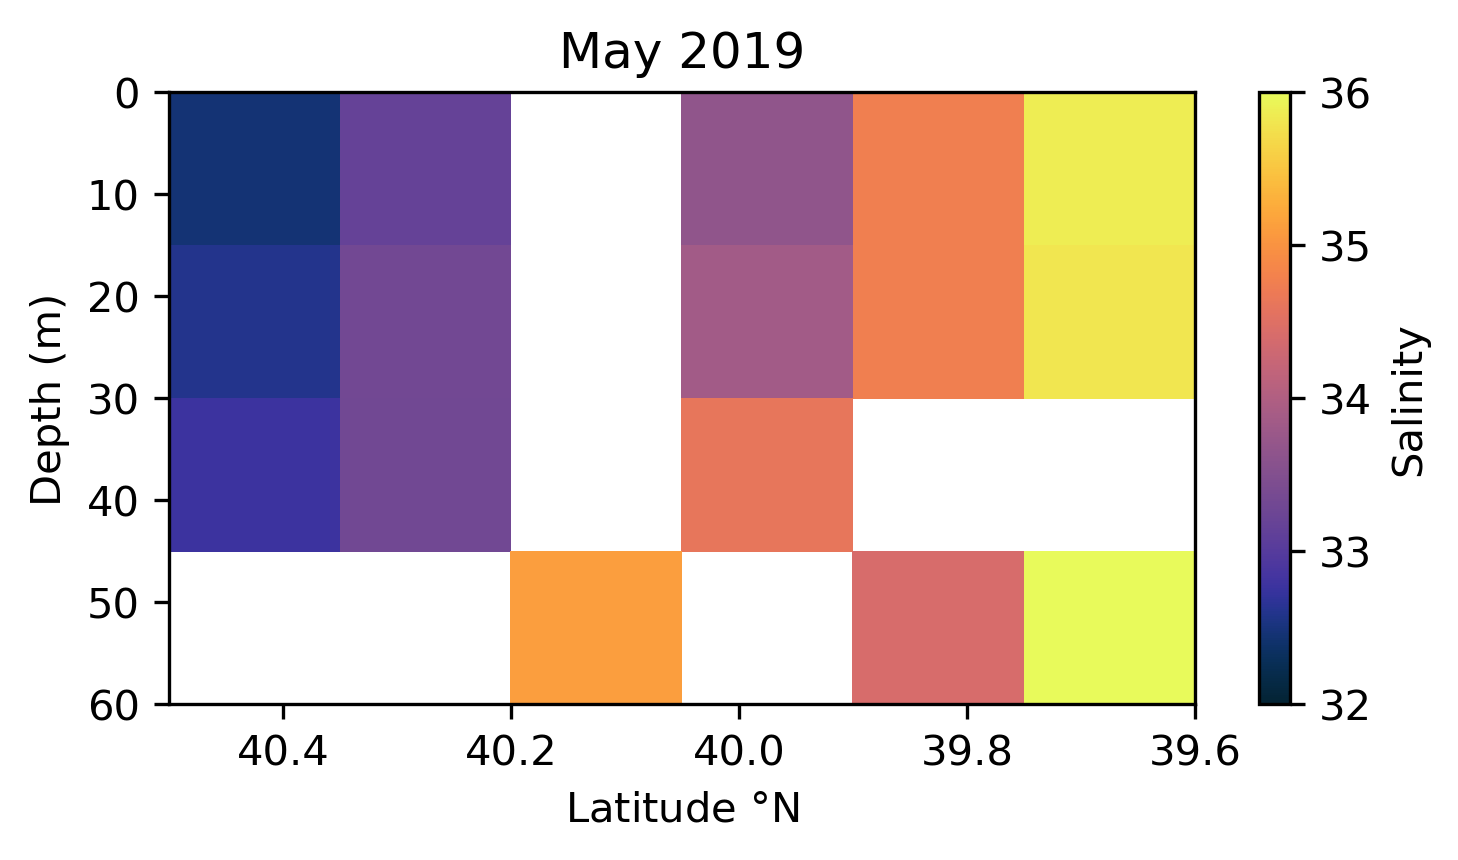

In [192]:
# need to bin the data into a grid to contour it

# make a grid
y = np.arange(0, 65, 15)
x = np.arange(39.6, 40.6, 0.15)

xx, yy = np.meshgrid(x, y)

# h = plt.plot(xx, yy, 'o')
# plt.show()

a = rb_ml.lat # x variable
b = rb_ml.truedepth_m # y variable
c = rb_ml.sal # z variable
binned = ss.binned_statistic_2d(a, b, c, statistic='mean', bins=[x, y])

# plot the binned data

XX, YY = np.meshgrid(binned.x_edge, binned.y_edge)

palette = 'cmo.thermal'

fig, (ax) =  plt.subplots(1, 1, figsize = (5, 3), dpi = 300)
plt.pcolormesh(XX, YY, binned.statistic.T, vmin = 32, vmax = 36, cmap = palette)
cb = plt.colorbar()
cb.set_label('Salinity')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('May 2019')
ax.set_xlabel('Latitude $\degree$N')
ax.set_ylabel('Depth (m)')

cb.set_ticks(np.arange(32,37,1))
plt.subplots_adjust(bottom=0.2, right = 0.98)

plt.savefig('../Figures/rb_sal_section.png')

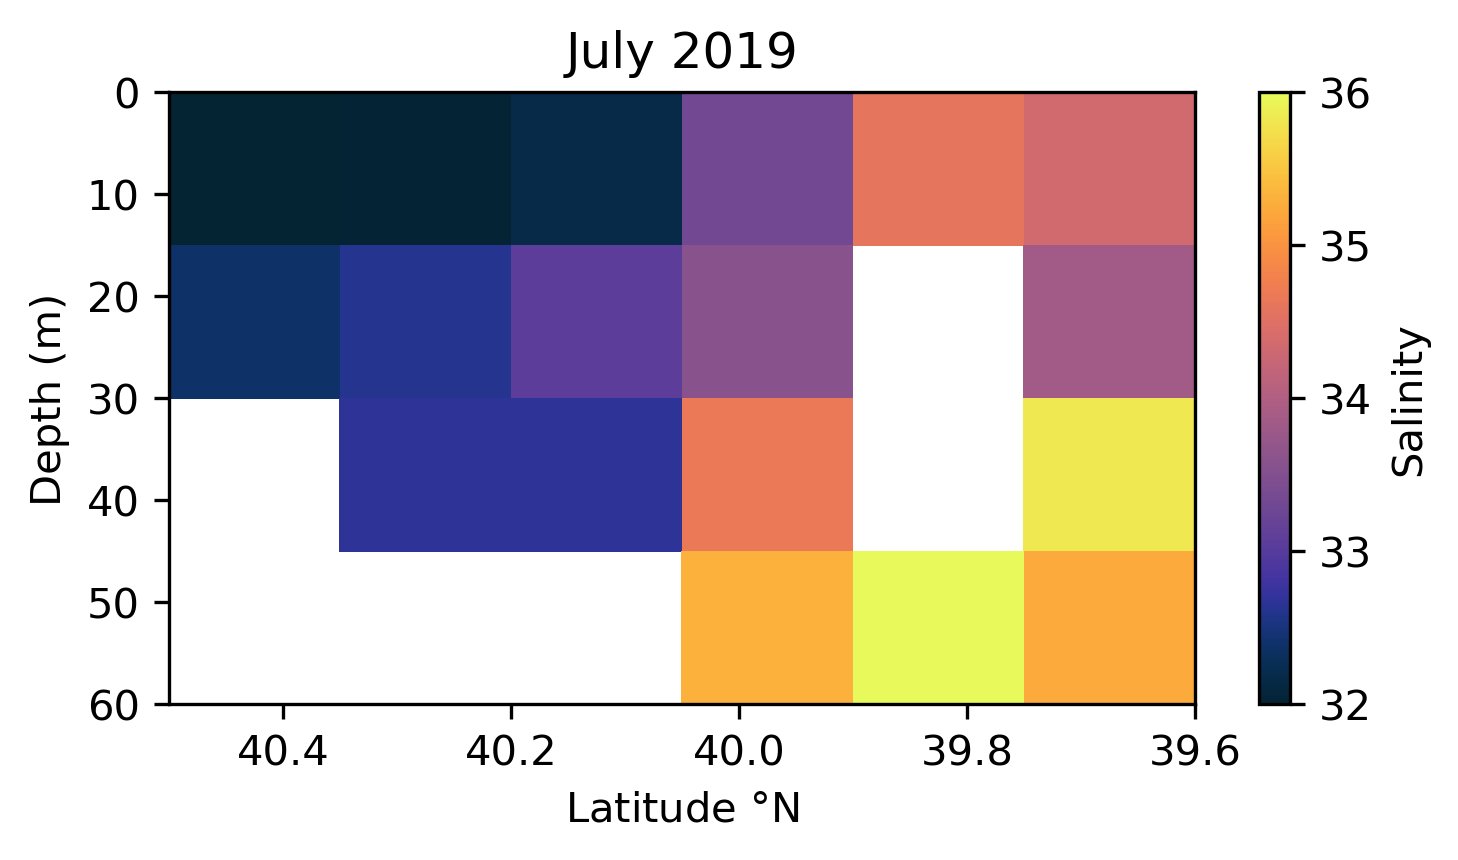

In [191]:
# need to bin the data into a grid to contour it

# make a grid
y = np.arange(0, 65, 15)
x = np.arange(39.6, 40.6, 0.15)

xx, yy = np.meshgrid(x, y)

# h = plt.plot(xx, yy, 'o')
# plt.show()

a = tn_nostream_ml.lat # x variable
b = tn_nostream_ml.truedepth_m # y variable
c = tn_nostream_ml.sal # z variable
binned = ss.binned_statistic_2d(a, b, c, statistic='mean', bins=[x, y])

# plot the binned data

XX, YY = np.meshgrid(binned.x_edge, binned.y_edge)

palette = 'cmo.thermal'

fig, (ax) =  plt.subplots(1, 1, figsize = (5, 3), dpi = 300)
plt.pcolormesh(XX, YY, binned.statistic.T, vmin = 32, vmax = 36, cmap = palette)
cb = plt.colorbar()
cb.set_label('Salinity')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('July 2019')
ax.set_xlabel('Latitude $\degree$N')
ax.set_ylabel('Depth (m)')

cb.set_ticks(np.arange(32,37,1))

plt.subplots_adjust(bottom=0.2, right = 0.98)

plt.savefig('../Figures/tn_sal_section.png')

C:\Users\corda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


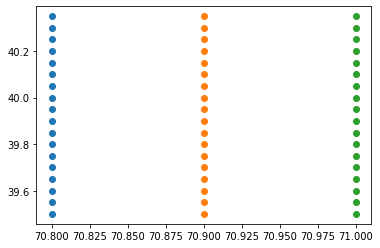

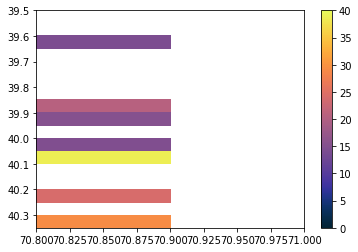

In [25]:
# need to bin the data into a grid to contour it

# make a grid
x = np.arange(70.8, 71, 0.1)
y = np.arange(39.5, 40.4, 0.05)

xx, yy = np.meshgrid(x, y)

h = plt.plot(xx, yy, 'o')
plt.show()

binned_tn_nfr_sfc = ss.binned_statistic_2d(tn_sfc.lon, tn_sfc.lat, tn_sfc.nfr, statistic='mean', bins=[x, y])

# plot the binned data

XX, YY = np.meshgrid(binned_tn_nfr_sfc.x_edge, binned_tn_nfr_sfc.y_edge)

palette = 'cmo.thermal'
plt.pcolormesh(XX, YY, binned_tn_nfr_sfc.statistic.T, vmin = 0, vmax = 40, cmap = palette)
cb = plt.colorbar()

plt.gca().invert_yaxis()

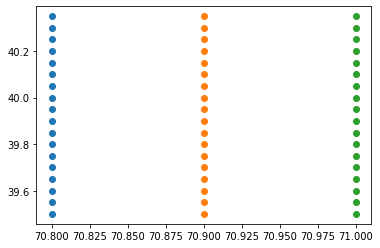

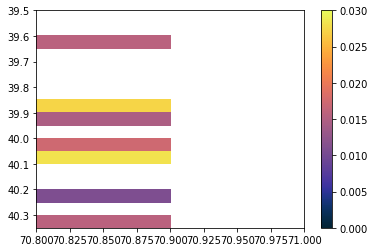

In [36]:
# need to bin the data into a grid to contour it

# make a grid
x = np.arange(70.8, 71, 0.1)
y = np.arange(39.5, 40.4, 0.05)

xx, yy = np.meshgrid(x, y)

h = plt.plot(xx, yy, 'o')
plt.show()

binned_tn_nfr_sfc = ss.binned_statistic_2d(tn_sfc.lon, tn_sfc.lat, tn_sfc.fc, statistic='mean', bins=[x, y])
XX, YY = np.meshgrid(binned_tn_nfr_sfc.x_edge, binned_tn_nfr_sfc.y_edge)

palette = 'cmo.thermal'
plt.pcolormesh(XX, YY, binned_tn_nfr_sfc.statistic.T, vmin = 0, vmax = 0.03, cmap = palette)
cb = plt.colorbar()

plt.gca().invert_yaxis()